# Preprocessing

In [1]:
import pandas as pd
import numpy as np

dataset = {"İsim": ["Sevdanur", "Selcuk", "Huseyin", "Dogus", "Haticenur", "Meltem"],
          "Soyad": ["Genc", "Genc", "Sahin", "Can", "Nalbant", "Onder"],
          "Yas": [24, 22, 24, 23, "bilinmiyor", 23],
          "Sehir": ["Bursa", "Ankara", "Istanbul", np.nan, "Izmir", "Istanbul"],
          "Ulke": ["Turkiye", "Turkiye", "Turkiye", "Turkiye", "Turkiye", "Turkiye"],
          "GANO": [np.nan, np.nan, np.nan, np.nan, 3.90, np.nan]}

df = pd.DataFrame(dataset)
df

,İsim,Soyad,Yas,Sehir,Ulke,GANO
0,Sevdanur,Genc,24,Bursa,Turkiye,NaN
1,Selcuk,Genc,22,Ankara,Turkiye,NaN
2,Huseyin,Sahin,24,Istanbul,Turkiye,NaN
3,Dogus,Can,23,NaN,Turkiye,NaN
4,Haticenur,Nalbant,bilinmiyor,Izmir,Turkiye,3.9
5,Meltem,Onder,23,Istanbul,Turkiye,NaN


----

# 1. Adım: Büyük resime bakın!

Her şeyden önce, bir preprocessing işlemine başlarken, veri tiplerine, satır-sütün sayılarına, eksik verilere ve genel şemaya bakarak başlamalısınız. Burada `<DataFrame>.info()` fonksiyonu ile bir önbilgi alınabilir.

 - İlk dikkatimi çeken unsur `Yas` kolonunun integer olması yerine object olması. Dataframe'e dönüp baktığımda yaşlardan birinin bilinmiyor olarak kodlandığını görüyorum. Eğer sayılardan oluşan bir kolonda farklı bir datatype varsa, pandas bunun object olarak algılayacaktır.
 - Dikkatimi çeken diğer bir unsur `Sehir` ve `GANO` kolonundaki eksik değerler, bunların halledilmesi gerekecek.
 - Toplam 6 satır olmasına rağmen `GANO` kolonunda sadece tek bir değer görebiliyorum, burada bu kolonu tamamen kaldırmak mantıklı olacağını düşünüyorum.
 - Ulke kolonundaki tüm değerler aynı, bu yüzden kaldırabiliriz.

In [2]:
df.info

<bound method DataFrame.info of         İsim    Soyad         Yas     Sehir     Ulke  GANO
0   Sevdanur     Genc          24     Bursa  Turkiye   NaN
1     Selcuk     Genc          22    Ankara  Turkiye   NaN
2    Huseyin    Sahin          24  Istanbul  Turkiye   NaN
3      Dogus      Can          23       NaN  Turkiye   NaN
4  Haticenur  Nalbant  bilinmiyor     Izmir  Turkiye   3.9
5     Meltem    Onder          23  Istanbul  Turkiye   NaN>

## NaN kontrolü
**NaN** değerleri saydırarak kontrol edelim. Eğer bir kez `.sum()` fonksiyonunu çağırırsam, kolon bazında toplayacaktır, eğer bir kez daha çağırırsam, eksik değerlerimin toplamını da görebilirim.

In [3]:
df.isna()

,İsim,Soyad,Yas,Sehir,Ulke,GANO
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,True,False,True
4,False,False,False,False,False,False
5,False,False,False,False,False,True


In [4]:
df.isna().sum()

İsim     0
Soyad    0
Yas      0
Sehir    1
Ulke     0
GANO     5
dtype: int64

In [5]:
df.isna().sum().sum()

6

----

# 2. Adım: Manipülasyona Başlayın!

## Bilgi içermeyen kolonların kaldırılması

GANO ve Ulke satırlarının kaldırılmasına karar vermiştik, bunu yapabileceğimiz iki yöntem var: 
 - Önkabul olarak, eğer kolonlar belirli bir eşik değerinin üzerinde *NaN* değer içerdiğinde kaldırmak istiyorsanız
 - Seçtiğiniz kolonları manuel olarak kaldırmak istiyorsanız

In [6]:
# 1. Yöntem
df.dropna(axis=1, how="any", thresh=3) # GANO Sütununun kaldırılması

# axis : coloumn'da mi yoksa row'da mi yapilacak o belirleniyor.
# how : any / all herhangi bir null iceriyorsa onu getiriyor.
# thresh : nan sayisi bu deger uzerinde cikarsa goster (thershold)
# bu kod ile kolonlar arasinda 3 taneden daha fazla nan degerler varsa onlari dusurmesi isteniyor.
# GANO sutununda 3'ten fazla nan oldugu icin artik o sutunu listelerken getirmiyor.

,İsim,Soyad,Yas,Sehir,Ulke
0,Sevdanur,Genc,24,Bursa,Turkiye
1,Selcuk,Genc,22,Ankara,Turkiye
2,Huseyin,Sahin,24,Istanbul,Turkiye
3,Dogus,Can,23,NaN,Turkiye
4,Haticenur,Nalbant,bilinmiyor,Izmir,Turkiye
5,Meltem,Onder,23,Istanbul,Turkiye


In [7]:
# 2. Yöntem
df.drop(labels=["GANO"], axis=1) 

# Eğer aynı dataframe'inize direk uygulamak istiyoranız inplace parametresine True değerini verin.
# df.drop(labels=["GANO"], axis=1, inplace=True)

# ozellikle bir column u silmek istersek drop ile yapabiliriz.

,İsim,Soyad,Yas,Sehir,Ulke
0,Sevdanur,Genc,24,Bursa,Turkiye
1,Selcuk,Genc,22,Ankara,Turkiye
2,Huseyin,Sahin,24,Istanbul,Turkiye
3,Dogus,Can,23,NaN,Turkiye
4,Haticenur,Nalbant,bilinmiyor,Izmir,Turkiye
5,Meltem,Onder,23,Istanbul,Turkiye


Ayrıca unutmadan Ulke satırındaki her değer aynı olduğu için modelimizin buna ihtiyacı olmayacak.

In [8]:
df.drop(labels=["GANO", "Ulke"], axis=1, inplace=True) 

# inplace : bunu dataframe e uygula, direk uzerine yaz! orjinali silinir.

In [9]:
df

,İsim,Soyad,Yas,Sehir
0,Sevdanur,Genc,24,Bursa
1,Selcuk,Genc,22,Ankara
2,Huseyin,Sahin,24,Istanbul
3,Dogus,Can,23,NaN
4,Haticenur,Nalbant,bilinmiyor,Izmir
5,Meltem,Onder,23,Istanbul


----

## Eksik değerlerin halledilmesi
Eksik değerlerin halledilmesiyle ilgili basit ve daha kompleks yöntemler var, burada amaç verisetimizde dezenformasyon yaratmadan bu problemlerin halledilmesi olmalı. Özellikle ML algoritmaları eksik verilere uyumlu değiller, bu yüzden ön işleme esnasında kritik konulardan birisini bu kısım oluşturuyor. 

Konunun önem derecesi arttıkça yaklaşımlarda değişiyor, genel bir yöntem ve herkesin kabul ettiği bir yaklaşım yok fakat size en popüler olanlarını göstermeye çalışacağım. 

Bu verileri direkt olarak kaldırabildiğiniz durumları yukarıda işledik, şimdi gelin kaldırmak istemediğimiz durumlarda neler yapabiliriz bunlara bakalım.

 - Mean, Median, Frequent, Constant
 - Enterpolasyon
 - KNN

### 1. En kolay teknik

#### Manuel

In [20]:
df_1 = df.copy()
df_1["Yas"]

0    24.0
1    22.0
2    24.0
3    23.0
4    23.0
5    23.0
Name: Yas, dtype: float64

In [21]:
df_1

,İsim,Soyad,Yas,Sehir
0,Sevdanur,Genc,24.0,Bursa
1,Selcuk,Genc,22.0,Ankara
2,Huseyin,Sahin,24.0,Istanbul
3,Dogus,Can,23.0,NaN
4,Haticenur,Nalbant,23.0,Izmir
5,Meltem,Onder,23.0,Istanbul


In [22]:
df_1["Yas"].replace("bilinmiyor", np.nan, inplace=True) # ilk önce eksik veriyi NaN formatına çeviriyorum
 
df_1

,İsim,Soyad,Yas,Sehir
0,Sevdanur,Genc,24.0,Bursa
1,Selcuk,Genc,22.0,Ankara
2,Huseyin,Sahin,24.0,Istanbul
3,Dogus,Can,23.0,NaN
4,Haticenur,Nalbant,23.0,Izmir
5,Meltem,Onder,23.0,Istanbul


In [23]:
df_1["Yas"].fillna(value=df_1["Yas"].mean(), inplace=True) # sonrasında o kolonun ortalaması ile dolduruyorum

df_1

# na olan degerleri istenen sekilde dolduruyor.

,İsim,Soyad,Yas,Sehir
0,Sevdanur,Genc,24.0,Bursa
1,Selcuk,Genc,22.0,Ankara
2,Huseyin,Sahin,24.0,Istanbul
3,Dogus,Can,23.0,NaN
4,Haticenur,Nalbant,23.0,Izmir
5,Meltem,Onder,23.0,Istanbul


#### Scikit

Scikit ile bu işlem oldukça kolaylaştırılmış, tekniğinize göre 4 yöntem seçebiliyorsunuz.

 - **mean:** Ortalama değer impute edilir.
 - **median:** Medyan impute edilir.
 - **most_frequent:** En çok tekrar eden değer eklenir. 
 - **constant:** sabit bir değer eklenir.

In [24]:
import numpy as np
from sklearn.impute import SimpleImputer

# SimpleImputer : verilerdeki eksiklikleri verilen yontemle gidermek icin kullanilir.
# missing_values : kayip verileri bul
# Strategy : yukaridaki seceneklerden birisi yazilyor, mean gibi.
# fit_transform : bu islemi nereye yapacagini belirliyoruz.

df_2 = df.copy()

df_2["Yas"].replace("bilinmiyor", np.nan, inplace=True)

imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_2["Yas"] = imp_mean.fit_transform(df_2[["Yas"]])

df_2

,İsim,Soyad,Yas,Sehir
0,Sevdanur,Genc,24.0,Bursa
1,Selcuk,Genc,22.0,Ankara
2,Huseyin,Sahin,24.0,Istanbul
3,Dogus,Can,23.0,NaN
4,Haticenur,Nalbant,23.0,Izmir
5,Meltem,Onder,23.0,Istanbul


In [25]:
df = df_2.copy() # bir sonraki işleme geçmeden DataFrame'in son halini geri alıyorum.

### 2. Enterpolasyon



Bu teknik biraz trickli olabilir, çünkü sürekli olduğunuz bir veride kullanmanız mantıklı olacaktır. Interpolasyon, elinizdeki veri noktalarının arasında bir değeri bilmediğiniz, bu iki değer arasındaki bilinmeyin noktadaki değeri bulmanızı sağlar. Mesela elinizde sıcaklık ile alakalı time-series bir data olduğunu düşünelim burada bir eksik veriniz varsa bu iki nokta arasındaki değeri bulmak için kullanabilirsiniz. Açı/Tork grafiği için verinin frekansını artırmak veya çözünürlük yükseltmek için kullanabilirsiniz.



Interpolasyon için basitçe bir örneğe göz atalım:

 - Sıralı giden bir array'de 2 değerinin eksik olduğunu görüyorsunuz, lineer bir düzlemde 1 ve 3 sayısı arasında 2 olması gerekmektedir. 
 
**Not:** Interpolasyon'u yüksek dereceli polinomlar üzerinde de kullanabilirsiniz.


<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Comparison_of_1D_and_2D_interpolation.svg/1280px-Comparison_of_1D_and_2D_interpolation.svg.png width="500" />

In [26]:
s = pd.Series([0, 1, np.nan, 3])

print(s)

0    0.0
1    1.0
2    NaN
3    3.0
dtype: float64


In [27]:
s.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

### 3. En yakın komşular

Varsayılan olarak, `nan_euclidean_distances` yakın komşuları bulmak için eksik değerleri destekleyen bir öklid mesafesi metriği kullanılır.

Her eksik özelliği,  `n_neighbors` sayısı kadar olan yakın komşuların değerleri kullanılarak bulunur. 

Komşuların özelliklerinin her bir komşuya olan uzaklığının ağırlıklı ortalaması alınır. 

<img src=https://www.edureka.co/blog/wp-content/uploads/2018/07/KNN-Algorithm-k3-edureka-437x300.png width="400" />

In [28]:
import numpy as np
from sklearn.impute import KNNImputer

X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
pd.DataFrame(X)

,0,1,2
0,1.0,2,NaN
1,3.0,4,3.0
2,NaN,6,5.0
3,8.0,8,7.0


In [29]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X = imputer.fit_transform(X)
pd.DataFrame(X)

,0,1,2
0,1.0,2.0,4.0
1,3.0,4.0,3.0
2,5.5,6.0,5.0
3,8.0,8.0,7.0


# 3. Adım: Eksikleri tamamlayın!

Gördüğünüz gibi matematiksel ve teorik işleri hallettikten sonra, **domain expert'in** kendi bilgisiyle ve kararlarıyla tamamlaması gereken konular kalacaktır. 

Örnek olarak aşağıda `Sehir` kolonunda kalan bir eksiğimiz var. Burada bir karar yukarıdaki tekniklerden birini kullanmaktır. Başka bir yaklaşım olarak burada bilinmeyen şehirlere `diğer` yazabiliriz.

In [30]:
df

,İsim,Soyad,Yas,Sehir
0,Sevdanur,Genc,24.0,Bursa
1,Selcuk,Genc,22.0,Ankara
2,Huseyin,Sahin,24.0,Istanbul
3,Dogus,Can,23.0,NaN
4,Haticenur,Nalbant,23.0,Izmir
5,Meltem,Onder,23.0,Istanbul


In [31]:
df["Sehir"] = df["Sehir"].replace(np.nan, "diğer")
df

,İsim,Soyad,Yas,Sehir
0,Sevdanur,Genc,24.0,Bursa
1,Selcuk,Genc,22.0,Ankara
2,Huseyin,Sahin,24.0,Istanbul
3,Dogus,Can,23.0,diğer
4,Haticenur,Nalbant,23.0,Izmir
5,Meltem,Onder,23.0,Istanbul


---

## 1. Standardization

Machine learning algoritmalarının büyük bir çoğunluğu iyi bir öğrenme için verinin standartlaştırılması gerekliliği duyar. Eğer veriniz Standart bir dağılım göstermiyorsa, bu modelin öğrenmesinde kötü bir performansa sebep olabilecek etkiler doğurabilir. Bu yüzden modele veriyi vermeden önce bir takım ön işlemler ile bu kötü etki ortadan kaldırılması gerekmektedir.

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png width="500"/>

### 1.1 Standard Scaler

In [35]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# bir column'daki dagilimin ortalamasi sifir, standart sapmasi bir
# olacak sekilde yeniden scale etme islemine deniyor.

df_ss = df.copy()

df_ss["Yas_Scaled"] = StandardScaler().fit_transform(df_ss[["Yas"]])

df_ss

,İsim,Soyad,Yas,Sehir,Yas_Scaled
0,Sevdanur,Genc,24.0,Bursa,1.212678
1,Selcuk,Genc,22.0,Ankara,-1.697749
2,Huseyin,Sahin,24.0,Istanbul,1.212678
3,Dogus,Can,23.0,diğer,-0.242536
4,Haticenur,Nalbant,23.0,Izmir,-0.242536
5,Meltem,Onder,23.0,Istanbul,-0.242536


In [36]:
print("X_train:", df_ss["Yas"].mean(axis=0), df_ss["Yas"].std(axis=0))

print("X_scaled:", df_ss["Yas_Scaled"].mean(axis=0), df_ss["Yas_Scaled"].std(axis=0))

X_train: 23.166666666666668 0.752772652709081
X_scaled: -1.6930901125533637e-15 1.0954451150103321


### 1.2 MinMax Scaler
Eğer çok küçük *standard sapması* olan, küçük sayı değerleriyle çalışıyorsanız **MinMaxScaler** yararlı olacaktır.

<img src=https://www.oreilly.com/library/view/regression-analysis-with/9781788627306/assets/ffb3ac78-fd6f-4340-aa92-cde8ae0322d6.png width="500" />

In [37]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df_mm = df.copy()

df_mm["Yas_Scaled"] = MinMaxScaler().fit_transform(df_mm[["Yas"]])

df_mm

,İsim,Soyad,Yas,Sehir,Yas_Scaled
0,Sevdanur,Genc,24.0,Bursa,1.0
1,Selcuk,Genc,22.0,Ankara,0.0
2,Huseyin,Sahin,24.0,Istanbul,1.0
3,Dogus,Can,23.0,diğer,0.5
4,Haticenur,Nalbant,23.0,Izmir,0.5
5,Meltem,Onder,23.0,Istanbul,0.5


## Not:

**Verilerinizde aykırı değerler varken, scaling işlemleri çok iyi sonuçlar vermez.**

*Peki neden? Elinizdeki verinin 1 ile 10 arasında dağılımı olduğunu düşünelim, veri setinin içerisinde yanlış olarak yazılmış 1000 değeri sizin scaling işleminizi bozarak, verinizi 1, 10 arasındaki tüm değerleri çok küçük bir alana sıkıştıracaktır.*

In [38]:
# KONUDAN BAĞIMSIZ
# bir sonraki adım için dataframe'i son haline getiriyorum
df["Yas"] = StandardScaler().fit_transform(df[["Yas"]]) 

## 3. Kategorik Değerlerin Ayrıştırılması

### 3.1 Label Encoding
Bir kolonunuzdaki değerleri sıralı bir biçimde sayısal forma getirmek için kullanılır. Elinizde 4 adet şehir ismi olduğunu varsayalım, eğer bu değerler birçok satırda aynı isimlerle tekrarlanıyorsa, bunları sayılar ile temsil edebilirsiniz. Aşağıdaki örnekte görebileceğiniz gibi Bursa 1 sayısı ile, Ankara 0 ile, Istanbul 2 iletemsil edilecektir.

*inverse_transform fonksiyonu ile geri alınabilir.*

In [39]:
df

,İsim,Soyad,Yas,Sehir
0,Sevdanur,Genc,1.212678,Bursa
1,Selcuk,Genc,-1.697749,Ankara
2,Huseyin,Sahin,1.212678,Istanbul
3,Dogus,Can,-0.242536,diğer
4,Haticenur,Nalbant,-0.242536,Izmir
5,Meltem,Onder,-0.242536,Istanbul


In [40]:
from sklearn import preprocessing
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

df_le = df.copy()

le = preprocessing.LabelEncoder()
le.fit(df_le["Sehir"])

list(le.classes_)

['Ankara', 'Bursa', 'Istanbul', 'Izmir', 'diğer']

In [41]:
df_le["Sehir"] = le.transform(df_le["Sehir"])
df_le

,İsim,Soyad,Yas,Sehir
0,Sevdanur,Genc,1.212678,1
1,Selcuk,Genc,-1.697749,0
2,Huseyin,Sahin,1.212678,2
3,Dogus,Can,-0.242536,4
4,Haticenur,Nalbant,-0.242536,3
5,Meltem,Onder,-0.242536,2


In [42]:
# Inverse_transform fonksiyonu ile geri alınabilir
list(le.inverse_transform([2, 2, 1, 0]))

['Istanbul', 'Istanbul', 'Bursa', 'Ankara']

### 3.2 One Hot Encoding
One Hot Encoding yöntemi bir kolon üzerindeki her bir sınıfı, o sınıfın **unique** değerleri uzunluğunda bir **vektöre** dönüştürür. Her değer bu vektör üzerindeki yerini 1 sayısını alarak belli eder, tanımı daha iyi anlamak için örneğe bakalım. 

Eğer kolonda [a, b, c] değerleri varsa. a [1, 0, 0] olarak temsil edilir, keza aynı şekilde b [0, 1, 0] şeklinde temsil edilecekt.

One Hot encoding yöntemini **Sci-kit** yerine pandasın **get_dummies** fonksiyonu ile çok daha hızlı ve rahat bir şekilde kullanabilirsiniz.

In [43]:
import pandas as pd

pd.get_dummies(df["Sehir"])

,Ankara,Bursa,Istanbul,Izmir,diğer
0,0,1,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,0,1,0
5,0,0,1,0,0


In [44]:
#birden fazla kolon uzerinde calisip o kolonlari tek bir tabloda birlestirmek icin bu kod kullanilir.
#pd.get_dummies(df_2, columns=['kolon1', 'kolon2', 'kolon3', 'kolon4'])

### 4. Kuantizasyon veya Binning

Kuantizasyon aslına bakarsanız, haberleşme, sinyal ve elektronik derslerindeki önemli unsurlardan bir tanesidir. Bildiğiniz gibi veri genellikle iki formda bulunur. Bunlardan ilki **ayrık** *(Discrete)* ve ikincisi **sürekli** (Continuous). Bazen verinizi sınıflara ayırmak istediğinizde bu işlem çok büyük önem arz etmektedir. Sürekli bir değeri sınıflara ayırmak karar ağaçlarında veya hedefinizi sınıflandırmak istediğinizde kullanabileceğiniz bir fonksiyondur.

Burada en basit yöntem yuvarlama olabilir, sayıyı belirli sayıların katlarına basitçe yuvarlayabilirsiniz, fakat daha bilimsel bir yöntem olan K-Bins kullanılabilir. 

In [45]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
# from sklearn import preprocessing
preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit_transform(X)
# nbins columnlari istenen sayida sinifa ayir.
# ornegin 15,14,11 i 13 uzerindeki degerler bir sinif ve 1 ile gosterilsin, 
# 13 altindakiler bir sinif ve 0 ile gosterilsin sekilde nbins'te verilen degere 
# yani iki sinifa bolunmus oldu. 

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

Örneği daha iyi anlamak adına her bir kolona bakabilirsiniz. **n_bins** parametresiyle kaç adet sınıfa bölmek istediğinizi seçebilirsiniz. Fonksiyon her bir kolona bakarak, n_bins sayısı kadar sınıfa bölecek ve değerlerin hangi sınıfa ait olduğunu bularak bu sayıyla temsil edecektir.

In [46]:
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)

# verilen degerin uzerindeki degerlere 1, altindaki degerlere 0 degerini veriyor.

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 1., 1.]])

# Feature Selection

Modelinizin iyi bir performans göstermesi için boyutsallığının azaltılması ve güçlü ilişkilere sahip parametrelerin, performansı kötü etkileyecek diğer parametrelerden ayrılması gerekir. Çünkü bu öznitelikler (features) modele bir bilgi getirmiyor olabilirler.

Pekala boyut düşürmenin veya öznitelik azaltmanın yararları nedir:

 - Daha yüksek doğruluk oranı
 - Overfitting probleminin önüne geçmek.
 - Model eğitim süresinin kısaltılması.
 - Daha etkin bir görselleştirme
 - Daha açıklanabilir bir model.

## Veri Seti

In [48]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv("mushrooms.csv")
data.head() 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [49]:
X = data.drop(['class'], axis=1)
y = data['class']   

In [50]:
X_encoded = pd.get_dummies(X, prefix_sep="_")
X_encoded

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [51]:
y_encoded = LabelEncoder().fit_transform(y)
y_encoded

array([1, 0, 0, ..., 0, 1, 0])

In [52]:
X_scaled = StandardScaler().fit_transform(X_encoded)
X_scaled

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size = 0.30, random_state=101)

# veriyi ikiye boluyoruz. yuzde 30 a boluyor. degerler random olarak siralaniyor.

In [54]:
X_train

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484,  1.2559503 , ...,  2.47010093,
        -0.21782364, -0.15558197]])

In [55]:
X_test

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ...,  2.47010093,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [56]:
y_train

array([0, 0, 0, ..., 1, 0, 1])

In [57]:
y_test

array([1, 0, 1, ..., 0, 0, 1])

## Feature Importance

Karar ağaçları çeşitli özniteliklerin önem derecelerini sıralamak için kullanılabilir. Karar ağaçlarındaki dallanma bildiğiniz gibi özniteliklerin sınıflandırıcılığıyla belirlenir. Bu yüzden daha çok kullanılan nodelar daha yüksek öneme sahip olabilirler.

In [58]:
import time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [59]:
start = time.process_time()

model = RandomForestClassifier(n_estimators=700).fit(X_train, y_train)

print(time.process_time() - start)

2.240829711


In [60]:
preds = model.predict(X_test)

print(confusion_matrix(y_test, preds))

[[1274    0]
 [   0 1164]]


In [61]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Tam bir başarı oranına sahibiz fakat burada bakacağımız konu aslında hangi niteliklerin ne kadar önemli olduğu. Bu yüzden feature importance metoduyla eğitilmiş modelin en önemli olduğu 10 parametreyi görselleştiriyorum.

In [62]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

model.feature_importances_

array([1.79395016e-03, 6.57005481e-05, 6.92764203e-04, 4.14231349e-04,
       5.19122731e-04, 1.17626871e-03, 4.48354789e-03, 2.11189308e-04,
       4.58528935e-03, 1.61613221e-03, 2.88550451e-03, 5.96813888e-04,
       8.43503471e-04, 1.18069512e-03, 1.47301635e-03, 1.20954648e-03,
       2.14214946e-04, 2.07778811e-04, 3.15743952e-03, 3.46763575e-03,
       3.41913687e-02, 2.53307822e-02, 5.04015668e-03, 1.20605093e-02,
       7.89375422e-02, 5.15108225e-03, 8.33112808e-04, 1.09544477e-01,
       1.51178514e-02, 2.95419581e-03, 4.28197022e-03, 7.53260305e-04,
       8.11111321e-04, 2.09029859e-02, 1.79798138e-02, 5.87483505e-02,
       6.58180904e-02, 3.79720867e-02, 1.41666293e-04, 7.88348540e-04,
       2.12141447e-03, 2.80852947e-04, 1.74367039e-03, 9.17186763e-05,
       2.90964007e-04, 2.02867732e-03, 5.83413973e-04, 2.17203130e-03,
       3.41961003e-04, 1.22355901e-02, 1.36033357e-02, 1.05516351e-02,
       1.70076905e-02, 8.06948489e-03, 1.58837223e-02, 1.71793304e-03,
      

In [63]:
feature_imp = pd.Series(model.feature_importances_, index= X_encoded.columns)
feature_imp

cap-shape_b    0.001794
cap-shape_c    0.000066
cap-shape_f    0.000693
cap-shape_k    0.000414
cap-shape_s    0.000519
                 ...   
habitat_l      0.001063
habitat_m      0.002824
habitat_p      0.004412
habitat_u      0.007596
habitat_w      0.001011
Length: 117, dtype: float64

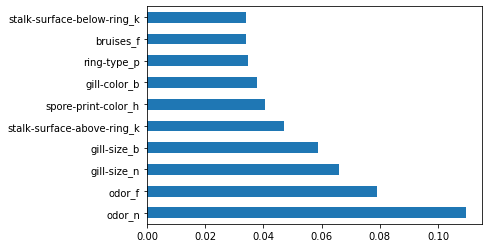

In [64]:
feature_imp.nlargest(10).plot(kind='barh')
# nlargest : girilen degerin en buyuk on degerini getiriyor

In [65]:
best_feat = feature_imp.nlargest(4).index.to_list() 
best_feat

['odor_n', 'odor_f', 'gill-size_n', 'gill-size_b']

In [66]:
X_reduced = X_encoded[feature_imp.nlargest(4).index]
X_reduced

,odor_n,odor_f,gill-size_n,gill-size_b
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,1,0,0,1
...,...,...,...,...
8119,1,0,0,1
8120,1,0,0,1
8121,1,0,0,1
8122,0,0,1,0


In [67]:
Xr_scaled = StandardScaler().fit_transform(X_reduced)
Xr_scaled

array([[-0.87614155, -0.60180814,  1.49468272, -1.49468272],
       [-0.87614155, -0.60180814, -0.66903831,  0.66903831],
       [-0.87614155, -0.60180814, -0.66903831,  0.66903831],
       ...,
       [ 1.14136808, -0.60180814, -0.66903831,  0.66903831],
       [-0.87614155, -0.60180814,  1.49468272, -1.49468272],
       [ 1.14136808, -0.60180814, -0.66903831,  0.66903831]])

In [68]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr_scaled, y, test_size = 0.30, 
                                                        random_state = 101)

In [69]:
start = time.process_time()
rmodel = RandomForestClassifier(n_estimators=700).fit(Xr_train,yr_train)
print(time.process_time() - start)

1.4180578830000004


In [70]:
rpred = rmodel.predict(Xr_test)
print(confusion_matrix(yr_test, rpred))

[[1248   26]
 [  53 1111]]


In [71]:
print(classification_report(yr_test, rpred))

              precision    recall  f1-score   support

           e       0.96      0.98      0.97      1274
           p       0.98      0.95      0.97      1164

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



Çok açık bir şekilde görebiliriz ki, eğitim süresi yarı yarıya inerken accuracy'den çok az kaybettik. Aslına bakarsanız bu çok küçük bir veriseti kazancımız 1 saniye kadar fakat bunu milyonlarca satıra sahip bir verisetiyle saatlerce eğittiğiniz bir model olduğunu düşünürseniz kesinlikle gireceğiniz bir tradeoff olacaktır.

## Correlation Matrix

In [72]:
import seaborn as sns

X = data.drop(['class'], axis=1)
y = data['class']

In [73]:
X_encoded = pd.get_dummies(X, prefix_sep="_")
X_encoded

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [74]:
y_encoded = LabelEncoder().fit_transform(y)
y_encoded

array([1, 0, 0, ..., 0, 1, 0])

In [75]:
X_encoded["Class"] = y_encoded

In [76]:
X_encoded.iloc[:, -7:].corr()

,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,Class
habitat_g,1.000000,-0.202512,-0.115762,-0.242715,-0.130592,-0.093276,-0.165004
habitat_l,-0.202512,1.000000,-0.065222,-0.136749,-0.073577,-0.052553,0.155150
habitat_m,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041,-0.138627
habitat_p,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986,0.323346
habitat_u,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889,0.112078
habitat_w,-0.093276,-0.052553,-0.030041,-0.062986,-0.033889,1.000000,-0.150087
Class,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087,1.000000


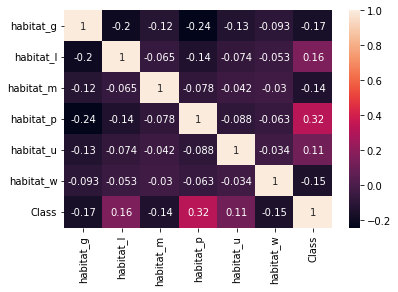

In [77]:
sns.heatmap(X_encoded.iloc[:, -7:].corr(), annot=True)
# annot : renklerin icerisinde sayilarin olup olmamasi ayarlaniyor.

Belirttiğimiz gibi eksi ve artı değerler güçlü korelasyonu ifade ediyor, burada sayının pozitif ve negatif olması ilişkinin ters veya doğru orantılı olarak değişmesi ile alakalı, her ikisi de bizim için iyi featurelar olabilir bu yüzden dataframe'in mutlak değerini alarak en yüksek değerli olanları getireceğiz.

In [78]:
X_encoded.corr().abs()["Class"]

# .nlarget ile sıralı bir şekilde en yüksek 10 değeri alabiliriz.
X_encoded.corr().abs()["Class"].nlargest(10)

Class                         1.000000
odor_n                        0.785557
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
ring-type_p                   0.540469
gill-size_n                   0.540024
gill-size_b                   0.540024
gill-color_b                  0.538808
bruises_t                     0.501530
Name: Class, dtype: float64

Bu zamana kadar yazdığımız kısmın sonunda index metodunu ekleyerek sadece kolon isimlerini istiyorum ve bunu ana datasetimizden başka bir değişkene aktarıyorum. Birazdan sadece bu kısmı kullanıyor olacağız, bu sayede daha okunaklı ve en yüksek 10 korelasyon değerine sahip kolon ile birlikte çalışıyor olacağız.

In [79]:
X_reduced_col_names = X_encoded.corr().abs()["Class"].nlargest(10).index
X_encoded[X_reduced_col_names].corr()

,Class,odor_n,odor_f,stalk-surface-above-ring_k,stalk-surface-below-ring_k,ring-type_p,gill-size_n,gill-size_b,gill-color_b,bruises_t
Class,1.000000,-0.785557,0.623842,0.587658,0.573524,-0.540469,0.540024,-0.540024,0.538808,-0.501530
odor_n,-0.785557,1.000000,-0.527269,-0.466499,-0.471920,0.352151,-0.457211,0.457211,-0.455399,0.285171
odor_f,0.623842,-0.527269,1.000000,0.584189,0.600449,-0.427514,-0.055394,0.055394,0.079360,-0.344642
stalk-surface-above-ring_k,0.587658,-0.466499,0.584189,1.000000,0.677074,-0.549484,0.095225,-0.095225,0.237814,-0.541494
stalk-surface-below-ring_k,0.573524,-0.471920,0.600449,0.677074,1.000000,-0.536122,0.089569,-0.089569,0.249536,-0.530549
ring-type_p,-0.540469,0.352151,-0.427514,-0.549484,-0.536122,1.000000,-0.308466,0.308466,-0.507885,0.767036
gill-size_n,0.540024,-0.457211,-0.055394,0.095225,0.089569,-0.308466,1.000000,-1.000000,0.776903,-0.369596
gill-size_b,-0.540024,0.457211,0.055394,-0.095225,-0.089569,0.308466,-1.000000,1.000000,-0.776903,0.369596
gill-color_b,0.538808,-0.455399,0.079360,0.237814,0.249536,-0.507885,0.776903,-0.776903,1.000000,-0.438292
bruises_t,-0.501530,0.285171,-0.344642,-0.541494,-0.530549,0.767036,-0.369596,0.369596,-0.438292,1.000000


Artık görselleştirme kısmına geçebiliriz. Çizdirdiğimiz görselin büyüklüğü ve çözünürlüğünü değiştirmek adına matplotlib kütüphanesini içeri aktarıyorum. figsize ile boyut, dpi ile çözünürülük ayarlanabilmektedir. heatmap içindeki "annot" ile karelerin içerisine değerlerini yazdırabiliyorum.

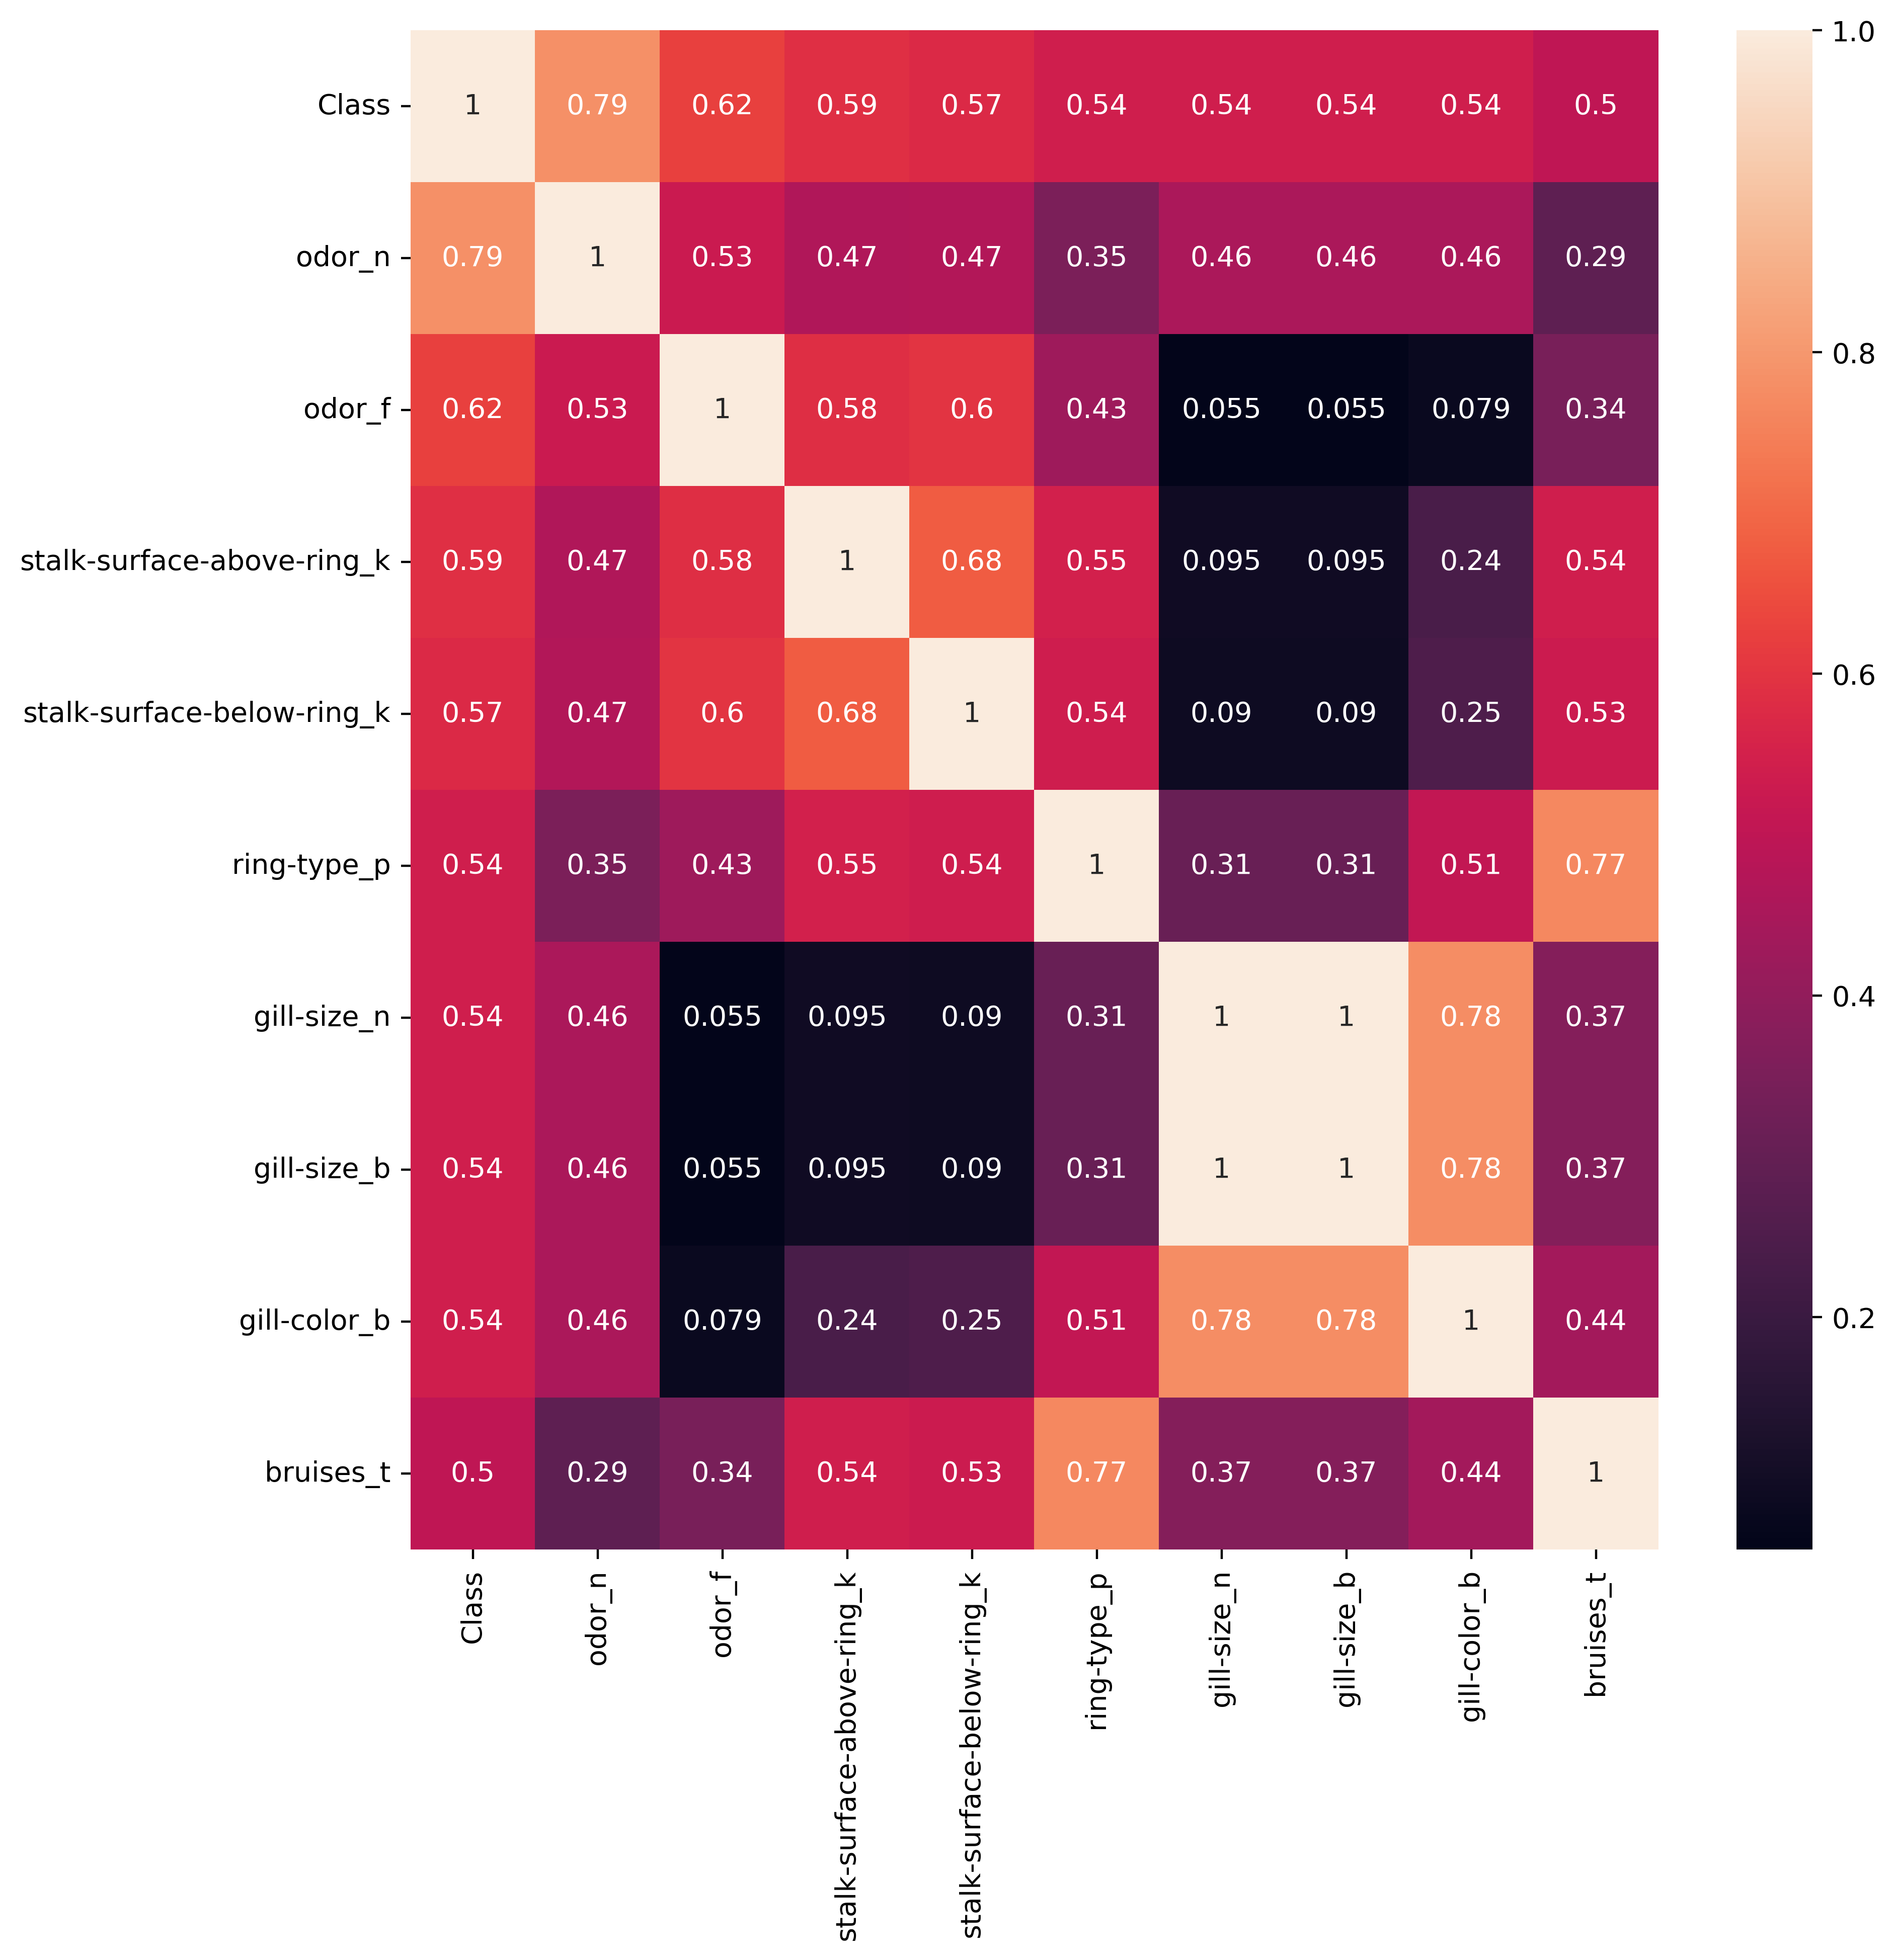

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), dpi=400)
sns.heatmap(X_encoded[X_reduced_col_names].corr().abs(), annot=True)

# Teşekkürler!